In [27]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
from PIL import Image

# Set image shape
IMAGE_SHAPE = (224, 224)

# Load and preprocess image
image = Image.open("goldfish.jpg").resize(IMAGE_SHAPE)
image_array = np.array(image) / 255.0
image_array = image_array[np.newaxis, ...].astype(np.float32)  # Ensure correct dtype

# Load feature extractor (no Keras Input, just TF Hub directly)
feature_extractor = hub.load("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4")

# Pass image directly through feature extractor
result = feature_extractor(image_array)

# Output shape
print("Feature vector shape:", result.shape)


Feature vector shape: (1, 1280)


In [28]:
result

<tf.Tensor: shape=(1, 1280), dtype=float32, numpy=
array([[0.10157788, 0.52491385, 0.        , ..., 0.        , 0.05650137,
        0.        ]], dtype=float32)>

In [29]:
predicted_label_index = np.argmax(result)
predicted_label_index

np.int64(388)

In [30]:
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [31]:
image_labels[predicted_label_index]

'lesser panda'

In [32]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [33]:
data_dir

'./datasets/flower_photos'

In [34]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [36]:
data_dir = data_dir / "flower_photos"

In [37]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/flower_photos/sunflowers/9538283930_0faea083bb_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/sunflowers/287233531_74d4605814_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/sunflowers/9216286162_6ceefdd1b4_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/sunflowers/2927020075_54c9186797_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/sunflowers/20078409301_aa8061bd0b_n.jpg')]

In [38]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [39]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/flower_photos/roses/4675532860_890504a4a3_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/17040847367_b54d05bf52.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/14154164774_3b39d36778.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/3751835302_d5a03f55e8_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/3655527028_0fab2b547d_n.jpg')]

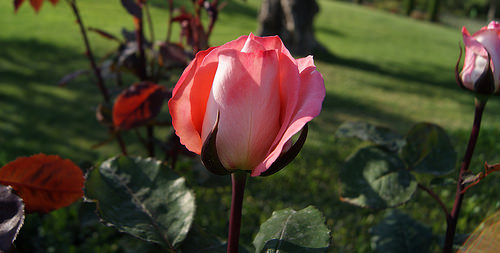

In [42]:
import PIL.Image as Image
Image.open(str(roses[1]))


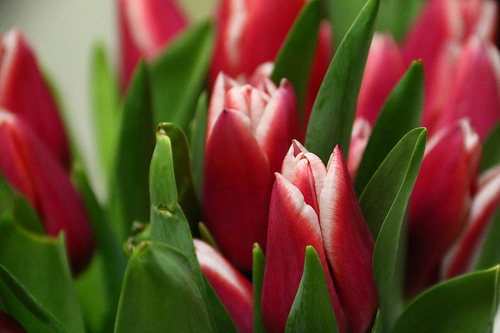

In [43]:
tulips = list(data_dir.glob('tulips/*'))
Image.open(str(tulips[0]))

In [44]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [45]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [46]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/flower_photos/roses/4675532860_890504a4a3_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/17040847367_b54d05bf52.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/14154164774_3b39d36778.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/3751835302_d5a03f55e8_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/3655527028_0fab2b547d_n.jpg')]

In [47]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [48]:
img.shape

(240, 160, 3)

In [49]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [50]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [51]:
X = np.array(X)
y = np.array(y)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [54]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [55]:
X[0].shape

(224, 224, 3)

In [56]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [60]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

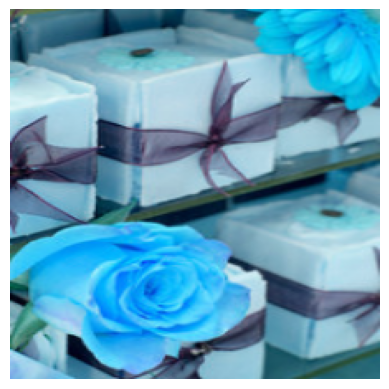

In [61]:
plt.axis('off')
plt.imshow(X[0])

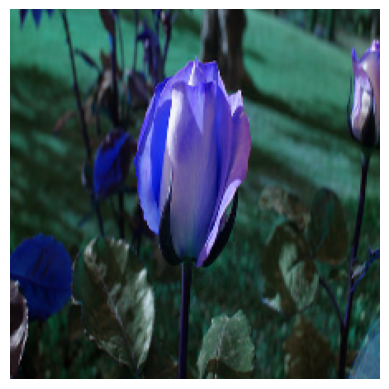

In [62]:
plt.axis('off')
plt.imshow(X[1])

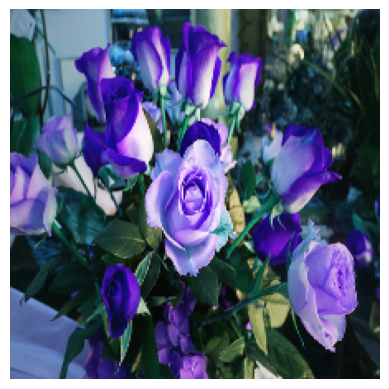

In [63]:
plt.axis('off')
plt.imshow(X[2])

In [65]:
batch = np.stack([x0_resized,x1_resized, x2_resized])

In [68]:
batch = batch.astype(np.float32)


In [69]:
classifier = hub.load("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4")
predicted = classifier(batch)  # batch of images
predicted_labels = tf.argmax(predicted, axis=1)
print(predicted_labels.numpy())


[722 795 722]


In [70]:
image_labels[795]

'shower curtain'

In [74]:
pretrained_model = hub.load("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4")

# Step 2: Create a function that uses this callable
def extract_features(images):
    return pretrained_model(images)

# Step 3: Wrap into a full model using Keras Functional API
inputs = tf.keras.Input(shape=(224, 224, 3))
x = tf.keras.layers.Lambda(lambda image: extract_features(image))(inputs)
outputs = tf.keras.layers.Dense(5)(x)  # 5 flower classes

model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Step 4: Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Step 5: View model summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │         6,405 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,405 (25.02 KB)

 Trainable params: 6,405 (25.02 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - acc: 0.5277 - loss: 1.2430
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 137s 995ms/step - acc: 0.8430 - loss: 0.4771
Epoch 3/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - acc: 0.8826 - loss: 0.3398
Epoch 4/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - acc: 0.9197 - loss: 0.2717
Epoch 5/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 140s 986ms/step - acc: 0.9314 - loss: 0.2420


In [76]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - acc: 0.8459 - loss: 0.3945   


[0.4065206050872803, 0.8551198244094849]